# Building an arbitrary Unitary quantum Gate

A quantum computation is a collection of the following three elements:

 - (1) A __register__ or a set of registers,
 - (2) A __unitary matrix U__, which is taylored to execute a given quantum algorithm, and
 - (3) __Measurements__ to extract information we need.
 
We know how we can define a register in Qiskit and How we can measure it. So in this session we will focus on the __Unitary Matrix___.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram

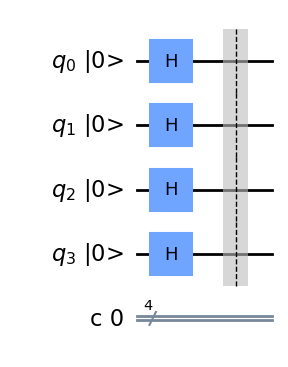

In [2]:
# let me consider an arbitrary quantum circuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(4,4)
# I apply some initial single quantum gates 
# These gates are also arbitrary without a particular purpose
qc.h(range(4))
qc.barrier()
qc.draw('mpl',initial_state=True)

## First Approach for building a quantum gate
To build an arbitrary quantum gate you can use from the basic gates inside the Qiskit. Look at the following example:

In [3]:
# To build a gate we define a quantum circuit without classical bit like below
gate1 = QuantumCircuit(2, name = 'gate1')
# Then we can use a bunch of the Qiskit gates in order to build an arbitrary gate.
gate1.cz(0,1)
gate1.x(0)
gate1.barrier()
gate1.h(1)
gate1.barrier()
gate1.cx(0,1)
# Make this circuit as a gate for qiskit
gate1.to_gate

<bound method QuantumCircuit.to_gate of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f48ea20eef0>>

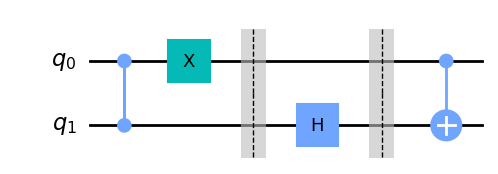

In [4]:
gate1.draw('mpl')

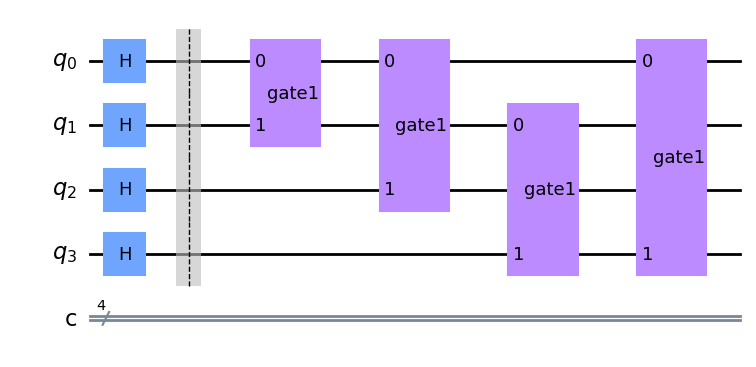

<IPython.core.display.Latex object>

In [5]:
# Now we can apply our gate on the qc circuit
qc.append(gate1,[0,1])
qc.append(gate1,[0,2])
qc.append(gate1,[1,3])
qc.append(gate1,[0,3])
display(qc.draw('mpl'),Statevector(qc).draw('latex'))

## Second Approach
In this approach consider you have a matrix and you are going to use it in Qiskit without utilizing a consequence of gates. To do this I will give an example

In [6]:
import numpy as np

In [7]:
# you can write any unitary gate that you need. In the following I am trying to build one
uni = np.zeros((4,4))

In [8]:
uni[0,0] = 1
uni[3,3] = 1
uni[1,2] = 1
uni[2,1] = 1
print(uni)
# test of being unitary
np.dot(np.transpose(uni),uni)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [9]:
from qiskit.quantum_info import Operator

In [10]:
gate2 = Operator(uni)

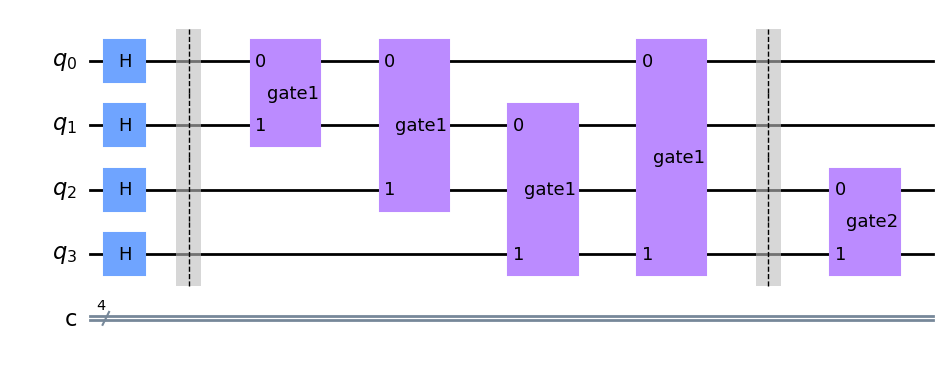

In [11]:
qc.barrier()
qc.unitary(gate2,(2,3),label='gate2')
qc.draw('mpl')

## Measurment 

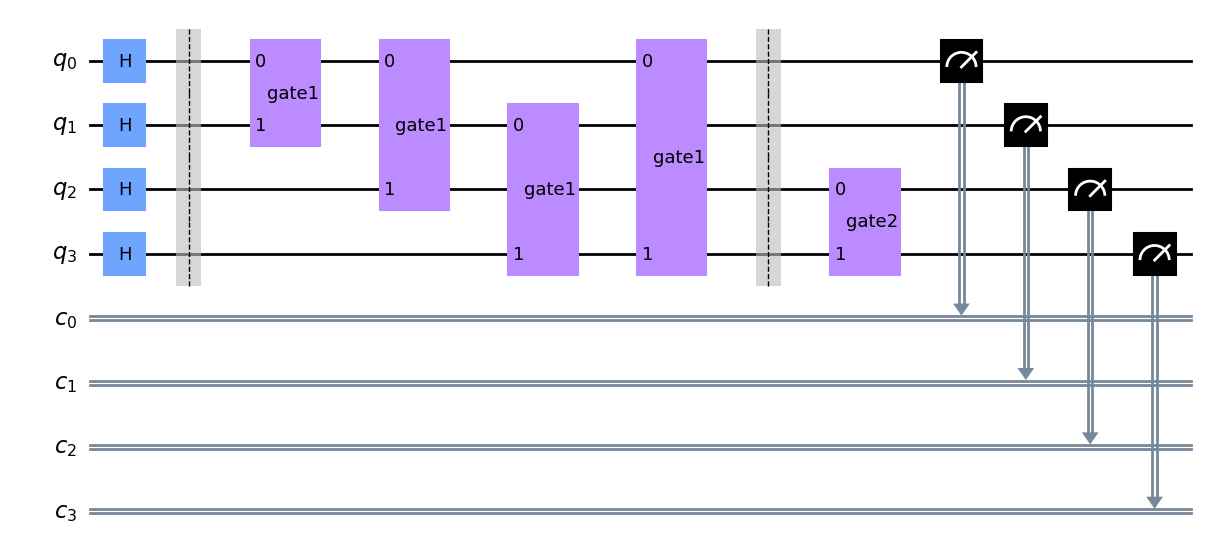

In [12]:
for i in range(4):
    qc.measure(i,i)

qc.draw('mpl',cregbundle=False)

In [13]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

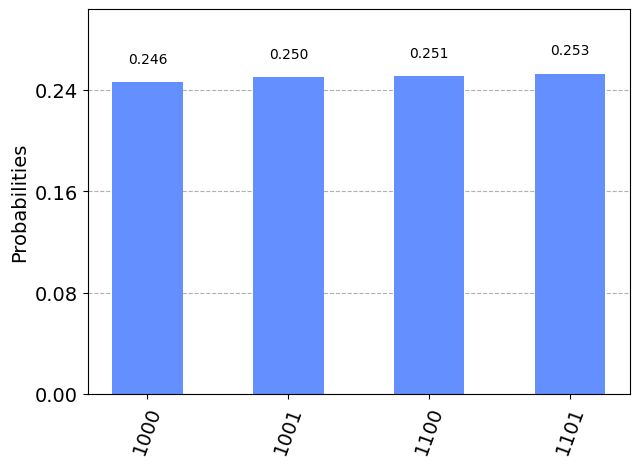

In [14]:
backend = QasmSimulator()
job = transpile(qc,backend)
result = backend.run(job,shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [15]:
counts

{'1000': 252, '1001': 256, '1100': 257, '1101': 259}